# LAB 3 - Prediction of Numeric Values

Submitted by <br>
Name: Parul Joshi <br>
Register Number: 21122041 <br>
Class: MSC DS Sem 2 <br>

## LAB OVERVIEW

### Objectives

- Import the neessary libraries.
- Do the necessary Exploratory Data Analysis
- Split the data accordingly to predict the rent.
- Show the Regression Score, Intercept and other parameters etc in the Output
- Explore wherever we can

### Problem Defination

**Common Instructions**
 - Use Pandas to Import the Dataset
 - Do the necessary Exploratory Data Analysis
 - Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
 - Show the Regression Score, Intercept and other parameters etc in the Output
 - Use visualizations and plots wherever possible
 - Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab
 
**Questions**
1. What are your observations on the Dataset?
2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

**Cases
Try to predict the rent of the below houses -**
1. 1 BHK with 2 Baths in Portofino Street
2. Fully Furnished 2 BHK in School Street
3. Single Room anywhere in Lavasa

### Approach

- Importing all libraries which we needed.
- Perform data preprocessing technique to get balanced structured data.
- Perform statistical data analysis and derive valuable inference.
- perform exploratory data analysis and derive valuable inference.
- Visualizing things with some plot and derive valuable inference.
- Train and test through LinearRegression models for better prediction.

### Sections

Sections for this lab are -
1. Lab Overview
1. Coding
1. References
1. Conclusion

## CODE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("D:\HousePrices.csv")

In [3]:
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0


In [4]:
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [5]:
df.tail()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
995,Super Furnished Villa,Portofino D,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino B,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino B,6 BHK,5100.0,7,6,3,90000.0
999,Super Furnished Villa,Portofino B,7 BHK,6300.0,6,6,3,96000.0


In [6]:
df.isnull().sum()

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

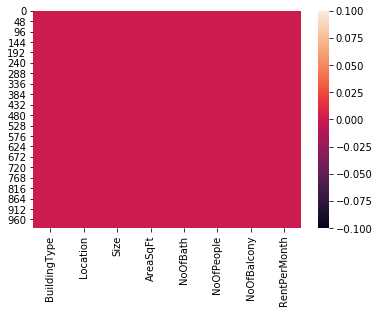

In [7]:
#see if the null values are present through visualization
sns.heatmap(df.isnull())

In [8]:
df.dtypes

BuildingType     object
Location         object
Size             object
AreaSqFt        float64
NoOfBath          int64
NoOfPeople        int64
NoOfBalcony       int64
RentPerMonth    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   object 
 1   Location      1000 non-null   object 
 2   Size          1000 non-null   object 
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [10]:
df.shape

(1000, 8)

In [11]:
df.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


In [12]:
#checking the correlation 
df.cor=df.corr()
df.cor

C:\Users\parul\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
AreaSqFt,1.000000,0.375791,0.374907,0.206123,0.473022
NoOfBath,0.375791,1.000000,0.480063,0.258885,0.579693
NoOfPeople,0.374907,0.480063,1.000000,0.184932,0.782853
NoOfBalcony,0.206123,0.258885,0.184932,1.000000,0.193619
RentPerMonth,0.473022,0.579693,0.782853,0.193619,1.000000


In [13]:
df.columns

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

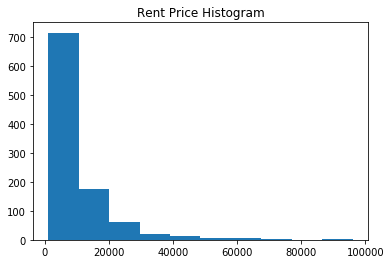

In [14]:
plt.hist(df['RentPerMonth'],bins=10)
plt.title('Rent Price Histogram')
plt.show()

In [15]:
df['BuildingType'].value_counts()

Semi Furnished Single Room     274
Semi Furnished Flat            246
Fully Furnished Single Room    153
Minimum Budget Rooms           146
Semi Furnished Villa            63
Fully Furnished Flat            41
Super Furnished Single Room     25
Super Furnished Villa           21
Fully Furnished Villa           19
Super Furnished Flat            12
Name: BuildingType, dtype: int64

In [16]:
df['Location'].value_counts()

Clubview Road    213
Portofino B      173
School Street    138
Portofino D      105
Portofino C      103
Portofino A       95
Portofino H       62
Portofino E       54
Portofino G       26
Portofino F       22
Starter Homes      9
Name: Location, dtype: int64

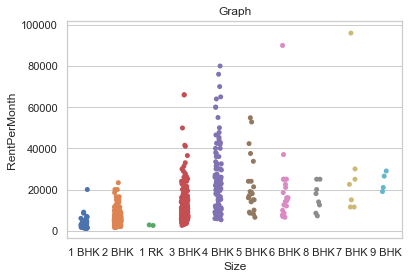

In [17]:
sns.set(style="whitegrid")
ax=sns.stripplot(x='Size',y='RentPerMonth',data=df);
plt.title('Graph')
plt.show()

In [18]:
df['Location'] = df['Location'].replace(['Portofino A','Portofino B','Portofino C','Portofino D','Portofino E','Portofino F','Portofino G','Portofino H'],'Portofino')
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino,4 BHK,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino,4 BHK,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4 BHK,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino,6 BHK,5100.0,7,6,3,90000.0


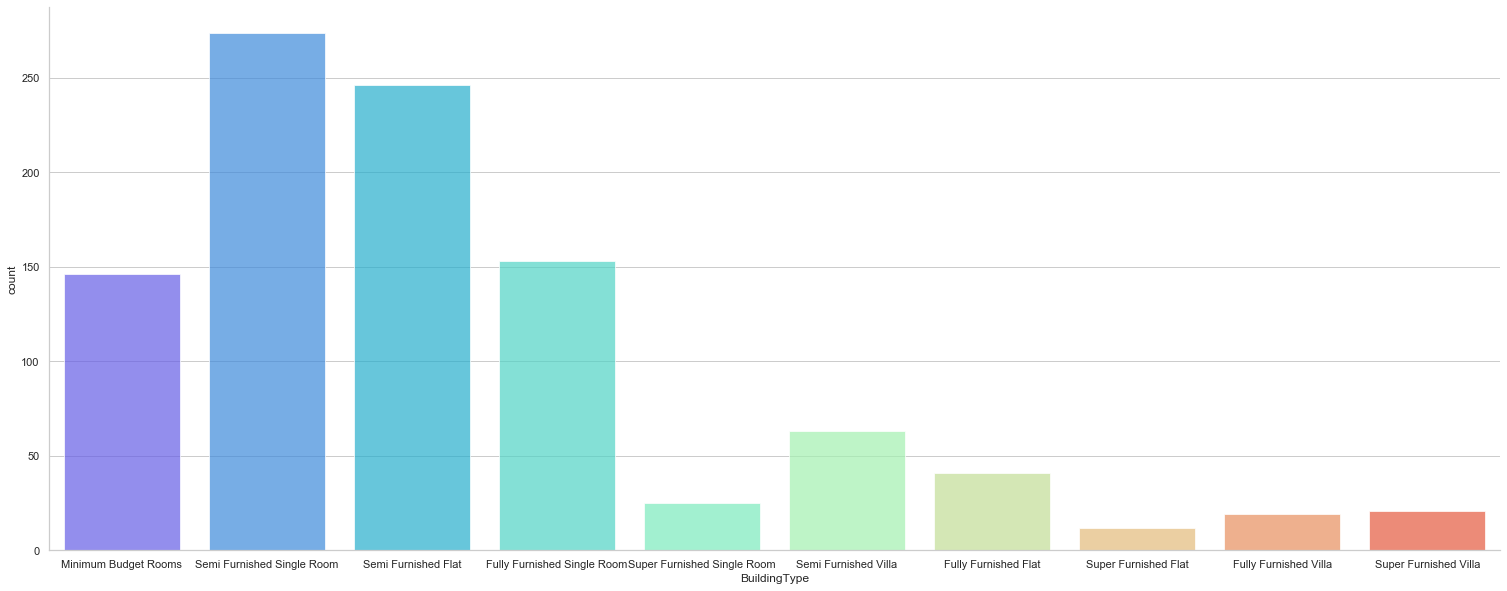

In [19]:
plt.figure(figsize = [26,10])
sns.countplot(x = 'BuildingType', palette = "rainbow", alpha = 0.7, data = df)
sns.despine()

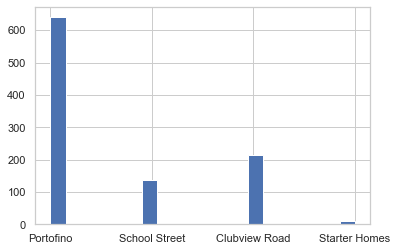

In [20]:
df.Location.hist(bins=20)

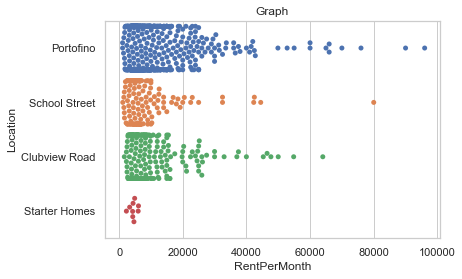

In [21]:
ax=sns.swarmplot(x='RentPerMonth',y='Location',data=df);
plt.title('Graph')
plt.show()

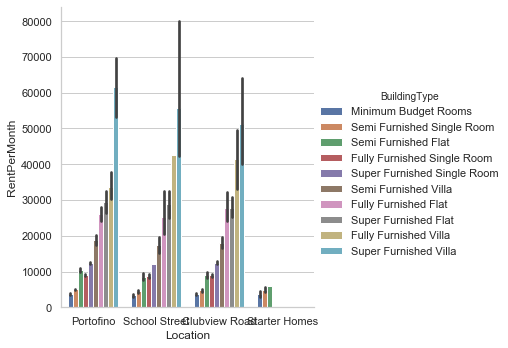

In [22]:
#set up a category plot
g=sns.catplot(x='Location',y='RentPerMonth',hue='BuildingType',data=df,kind='bar')

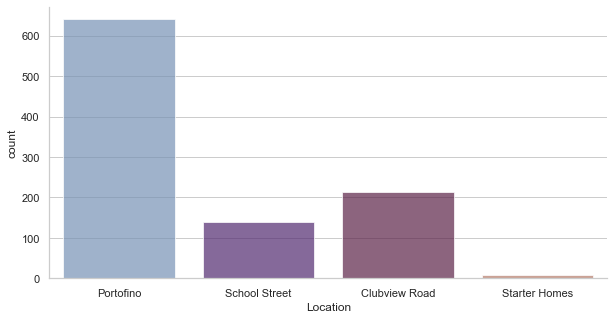

In [23]:
plt.figure(figsize = [10,5])
sns.countplot(x = 'Location', palette = "twilight", alpha = 0.7, data = df)
sns.despine()

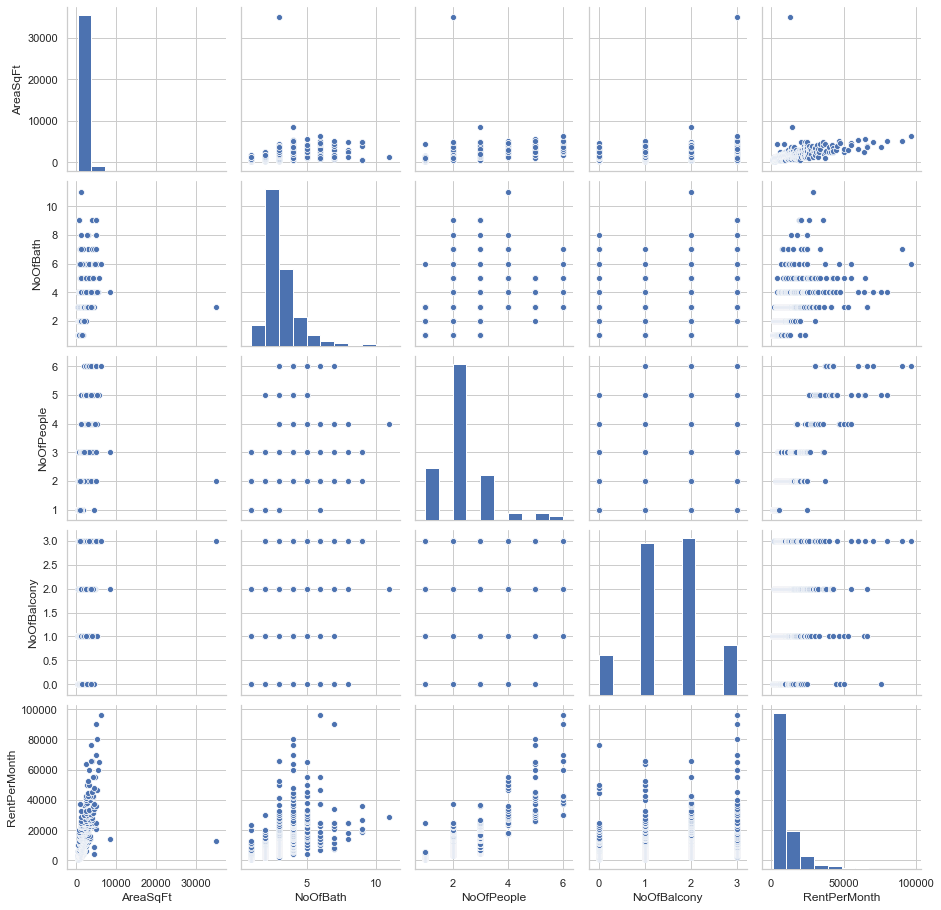

In [24]:
sns.pairplot(df)

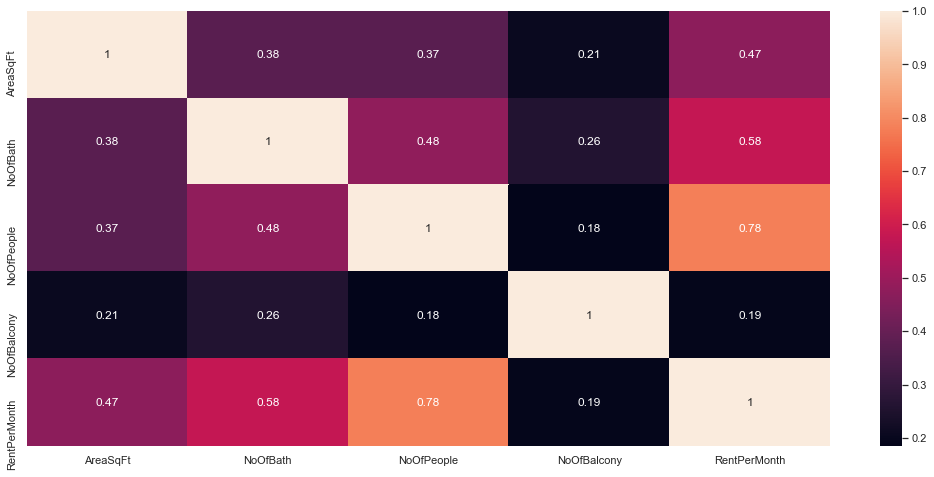

In [25]:
plt.figure(figsize = [18,8])
sns.heatmap(df.corr(),annot=True)

In [26]:
df.max()

BuildingType    Super Furnished Villa
Location                Starter Homes
Size                            9 BHK
AreaSqFt                        35000
NoOfBath                           11
NoOfPeople                          6
NoOfBalcony                         3
RentPerMonth                    96000
dtype: object

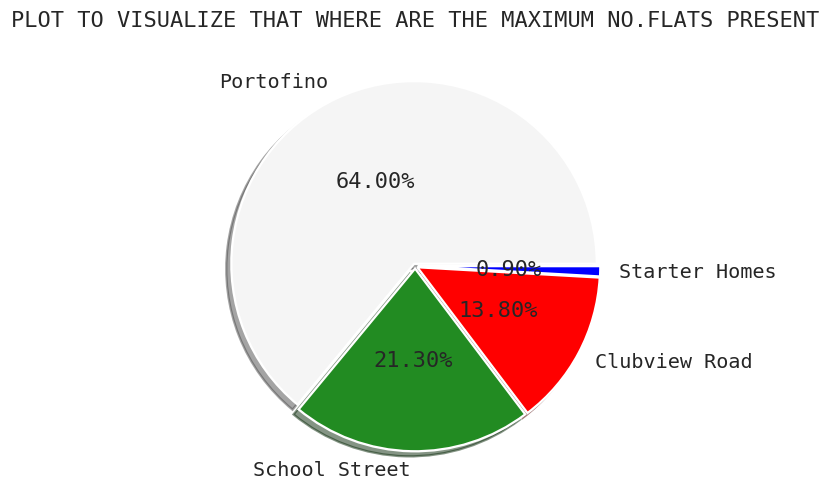

In [27]:
val=df['Location'].value_counts().values.tolist()
lbl=['Portofino',"School Street","Clubview Road","Starter Homes"]
exp=(0.015,0.015,0.015,0.015)
clr=("whitesmoke",'forestgreen','red','blue')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.5, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THAT WHERE ARE THE MAXIMUM NO.FLATS PRESENT\n')
plt.show()

In [28]:
# Create a function where size column give only integer part
def remove_BHK(x):
    x=int(x[0])
    return x

In [29]:
remove_BHK('1 BHK')

1

In [30]:
# Apply above function in size column
df['Size'] = df['Size'].apply(remove_BHK)
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino,1,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino,1,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino,1,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,Super Furnished Villa,Portofino,4,4900.0,4,6,3,70000.0
996,Super Furnished Villa,Portofino,4,3750.0,4,5,0,76000.0
997,Super Furnished Villa,School Street,4,5270.0,4,5,3,80000.0
998,Super Furnished Villa,Portofino,6,5100.0,7,6,3,90000.0


In [31]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['BuildingType', 'Location'], dtype='object')


In [32]:
le = LabelEncoder()
for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   int32  
 1   Location      1000 non-null   int32  
 2   Size          1000 non-null   int64  
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 54.8 KB
None


In [33]:
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,3,1,1,400.0,1,1,1,1100.0
1,3,1,1,450.0,1,1,1,1100.0
2,3,2,1,530.0,1,1,0,1166.0
3,3,1,1,400.0,1,1,0,1400.0
4,3,2,2,460.0,1,1,0,1500.0
...,...,...,...,...,...,...,...,...
995,9,1,4,4900.0,4,6,3,70000.0
996,9,1,4,3750.0,4,5,0,76000.0
997,9,2,4,5270.0,4,5,3,80000.0
998,9,1,6,5100.0,7,6,3,90000.0


In [34]:
#IMPORTING IMPORTANT LIBRARIES FOR MODEL GENERATION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score

In [36]:
data1 = {'test_size':[],'norm':[],'r_score':[],'mae':[],'mse':[],'r2_score':[]}
test_size = [0.5,0.4,0.3,0.2]
n_value = [True,False]
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=i, random_state=2)
    for j in n_value:
        r = LinearRegression(normalize=j).fit(X_train, y_train)
        ycap = r.predict(X_test)
        #print(r.score(X_test,y_test))
        #print(f'MSE train-test ratio: {(1-i)*100}:{i*100} - {mean_squared_error(y_test, ycap)}')
        #print(f'MAE train-test ratio: {(1-i)*100}:{i*100} - {mean_absolute_error(y_test, ycap)}')
        #print(f'regression score function train-test ratio: {(1-i)*100}:{i*100} - {r2_score(y_test, ycap)}')
        #print("=*"*50)
        data1['test_size'].append(i)
        data1['norm'].append(j)
        data1['r_score'].append(r.score(X_test,y_test))
        data1['mae'].append(mean_absolute_error(y_test, ycap))
        data1['mse'].append(mean_squared_error(y_test, ycap))
        data1['r2_score'].append(r2_score(y_test, ycap))
data1 = pd.DataFrame(data1)
data1

,test_size,norm,r_score,mae,mse,r2_score
0,0.5,True,-0.544352,4268.735146,1.427023e+08,-0.544352
1,0.5,False,-0.544352,4268.735146,1.427023e+08,-0.544352
2,0.4,True,-0.977358,4411.957837,1.551198e+08,-0.977358
3,0.4,False,-0.977358,4411.957837,1.551198e+08,-0.977358
4,0.3,True,0.597190,3966.604107,2.578813e+07,0.597190
5,0.3,False,0.597190,3966.604107,2.578813e+07,0.597190
6,0.2,True,0.469586,4034.828181,2.688959e+07,0.469586
7,0.2,False,0.469586,4034.828181,2.688959e+07,0.469586


**Questions**
1. What are your observations on the Dataset?
2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?

**1. Observation on the dataset**
- The dataset shows the 
  1. Building Type - Is it a fully/semi/Un furnished Single Room, Flat, or Villa ?
  1. Location - Where is the property located?
  1. Size - Is it 1BHK, 2BHK, 3BHK ?
  1. AreaSqFt - How much big is the property ? 
  1. No of Bath - How many bathrooms in the property?
  1. No of Balcony - How many balconies in the property?
  1. No of People - How many people stayed in the building in the academic year 2020-21.
  1. RentPerMonth - Rent to be paid per month which is demanded by the current building owners.

**2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?**
 - Different Error Measures (Evaluation Metrics) in relation to Linear Regression are MAE, MSE, r2, RMSE.

In [46]:
data1

,test_size,norm,r_score,mae,mse,r2_score
0,0.5,True,-0.544352,4268.735146,1.427023e+08,-0.544352
1,0.5,False,-0.544352,4268.735146,1.427023e+08,-0.544352
2,0.4,True,-0.977358,4411.957837,1.551198e+08,-0.977358
3,0.4,False,-0.977358,4411.957837,1.551198e+08,-0.977358
4,0.3,True,0.597190,3966.604107,2.578813e+07,0.597190
5,0.3,False,0.597190,3966.604107,2.578813e+07,0.597190
6,0.2,True,0.469586,4034.828181,2.688959e+07,0.469586
7,0.2,False,0.469586,4034.828181,2.688959e+07,0.469586


**3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20**

In [47]:
data1

,test_size,norm,r_score,mae,mse,r2_score
0,0.5,True,-0.544352,4268.735146,1.427023e+08,-0.544352
1,0.5,False,-0.544352,4268.735146,1.427023e+08,-0.544352
2,0.4,True,-0.977358,4411.957837,1.551198e+08,-0.977358
3,0.4,False,-0.977358,4411.957837,1.551198e+08,-0.977358
4,0.3,True,0.597190,3966.604107,2.578813e+07,0.597190
5,0.3,False,0.597190,3966.604107,2.578813e+07,0.597190
6,0.2,True,0.469586,4034.828181,2.688959e+07,0.469586
7,0.2,False,0.469586,4034.828181,2.688959e+07,0.469586


**4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?**
 - During LinearRegression() process if we put Normalize Parameter equals to false, then the errors are less.

### Predicting rent for the given requirements
 - Cases
   - Try to predict the rent of the below houses -
   - 1. 1 BHK with 2 Baths in Portofino Street
   - 2. Fully Furnished 2 BHK in School Street
   - 3. Single Room anywhere in Lavasa

In [37]:
value = dict()
for i in X_test.columns:
    print(i,": ")
    value[i] = float(input())

BuildingType : 
1
Location : 
1
Size : 
1
AreaSqFt : 
670
NoOfBath : 
2
NoOfPeople : 
1
NoOfBalcony : 
1


In [38]:
df1=pd.DataFrame(value,index=[0])
df1

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
0,1.0,1.0,1.0,670.0,2.0,1.0,1.0


In [39]:
r.predict(df1)

array([-1873.26609998])

In [40]:
dict1 = dict()
for i in X_test.columns:
    print(i,": ")
    dict1[i] = float(input())

BuildingType : 
9
Location : 
4
Size : 
2
AreaSqFt : 
1132
NoOfBath : 
2
NoOfPeople : 
2
NoOfBalcony : 
2


In [41]:
df2=pd.DataFrame(dict1,index=[0])
df2

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
0,9.0,4.0,2.0,1132.0,2.0,2.0,2.0


In [42]:
r.predict(df2)

array([10399.92355864])

In [43]:
dict2 = dict()
for i in X_test.columns:
    print(i,": ")
    dict2[i] = float(input())

BuildingType : 
1
Location : 
0
Size : 
3
AreaSqFt : 
1753
NoOfBath : 
1
NoOfPeople : 
1
NoOfBalcony : 
1


In [44]:
df3=pd.DataFrame(dict2,index=[0])
df3

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony
0,1.0,0.0,3.0,1753.0,1.0,1.0,1.0


In [45]:
r.predict(df3)

array([-2702.411849])

# Conclusion:
 - In this lab, we have tried to gain the knowledge about data and its varibles, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights, furthermore, we implemented and evaluated LinearRegression model to get high accuracy in term of predicting rental price to find houses for people who are in search for the one according to their preferences.

# Reference
 - https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
 - https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
 - https://pandas.pydata.org/
 - https://matplotlib.org/
 - https://seaborn.pydata.org/
 - https://plotly.com/
 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
 - https://www.kaggle.com/c/house-prices-advanced-regression-techniques